# 1. Circulation
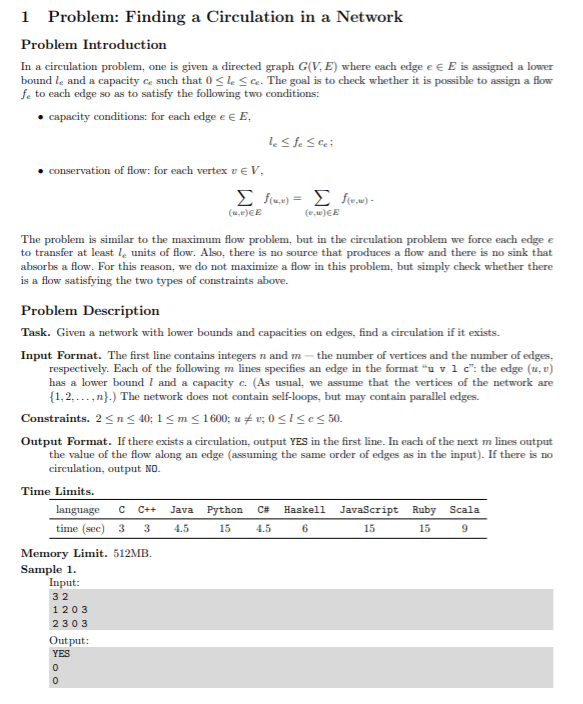

In [1]:
# python3
# nos dan los inputs de la forma u v l c, que significan que el eje (u,v) 
# tiene un eje de u a v con lower bound l y capacidad c. El network no tiene self loops
# Hay que asignarle un flow a cada eje tal que l_e <= f_e <= c_e y que se cumpla el conservation
#of flow.
#si existe dicho flow, hay que imptimit Y y luego m lineas con los flujos en cada eje 
#(en el mismo orden que los inputs)

import sys
import queue

class Edge:
    #definimos la clase de ejes que contiene todos los ejes
    def __init__(self, u, v, lower, cap):
        # el punto de salida es u
        self.u = u
        #el punto de llegada es v
        self.v = v
        #el lower es el peso minimo en el eje
        self.lower = lower
        #el cap es la capacidad max del eje
        self.cap = cap
        #dif es la diferencia entre capacidad y lower
        self.dif = cap - lower
        #flow es el flow que tiene
        self.flow = 0


class FlowGraph:

    def __init__(self, n):
        # vamos a hacer una lista con todos los ejes
        self.edges = []
        # creamos una lista
        self.graph = [[] for _ in range(n+2)]
        # demand function
        self.dv = [0] * (n+2)
        self.D = 0

    def add_edge(self, from_, to, lowerbound, capacity):
        #agregamos un eje.
        # vamos a ir agregando los ejes
        # lo hacemos de tal forma que todos los ejes 'hacia adelante' est'an en posciiones
        #pares, y los otros en posiciones impares
        forward_edge = Edge(from_, to, lowerbound, capacity)
        backward_edge = Edge(to, from_, 0, 0)
        self.graph[from_].append(len(self.edges))
        self.edges.append(forward_edge)
        self.graph[to].append(len(self.edges))
        self.edges.append(backward_edge)
        self.dv[from_] += lowerbound
        self.dv[to] -= lowerbound

    def size(self):
        return len(self.graph)

    def get_ids(self, from_):
        return self.graph[from_]

    def get_edge(self, id):
        return self.edges[id]

    def add_flow(self, id, flow):
        # To get a backward edge for a true forward edge (i.e id is even), we should get id + 1
        # due to the described above scheme. On the other hand, when we have to get a "backward"
        # edge for a backward edge (i.e. get a forward edge for backward - id is odd), id - 1
        # should be taken.
        #
        # It turns out that id ^ 1 works for both cases. Think this through!
        self.edges[id].flow += flow
        self.edges[id ^ 1].flow -= flow
        self.edges[id].diff -= flow
        self.edges[id ^ 1].diff += flow

class CirculationProblem:
    def __init__(self):
        graph, n, m = self._input()
        flow, flows = self.findCirculation(graph, n, m)
        self.printResult(flow, flows)
    
    def _input(self):
        vertex_count, edge_count = map(int, input().split())
        graph = FlowGraph(vertex_count)
        for _ in range(edge_count):
            u, v, lowerbound, capacity = map(int, input().split())
            graph.add_edge(u-1, v-1, lowerbound, capacity)
        
        # update source and sink
        for v in range(vertex_count):
            if graph.dv[v] < 0:
                graph.add_edge(vertex_count, v, 0, -graph.dv[v])
            if graph.dv[v] > 0:
                graph.add_edge(v, vertex_count+1, 0, graph.dv[v])
                graph.D += graph.dv[v]

        return graph, vertex_count, edge_count

    def bfs(self, graph, from_, to):
        X = float('inf')
        hasPath = False
        n = graph.size()
        dist = [float('inf')] * n
        path = []
        parent = [(None, None)] * n
        q = queue.Queue()
        dist[from_] = 0
        q.put(from_)
        while not q.empty():
            currFromNode = q.get()
            for id in graph.get_ids(currFromNode):
                currEdge = graph.get_edge(id)
                if float('inf') == dist[currEdge.v] and currEdge.diff > 0:
                    dist[currEdge.v] = dist[currFromNode] + 1
                    parent[currEdge.v] = (currFromNode, id)
                    q.put(currEdge.v)
                    if currEdge.v == to:
                        while True:
                            path.insert(0, id)
                            currX = graph.get_edge(id).diff
                            X = min(currX, X)
                            if currFromNode == from_:
                                break
                            currFromNode, id = parent[currFromNode]
                        hasPath = True
                        return hasPath, path, X
        return hasPath, path, X

    def max_flow(self, graph, from_, to):
        flow = 0
        while True:
            hasPath, path, X = self.bfs(graph, from_, to)
            if not hasPath:
                return flow
            for id in path:
                graph.add_flow(id, X)
            flow += X
        return flow
    
    def findCirculation(self, graph, n, m):
        flow = self.max_flow(graph, n, n+1)
        #print(flow, graph.D, graph.edges, m)
        flows = [0] * m
        if flow != graph.D:
            return False, flows
        else:
            for i in range(m):
                currForwardEdge = graph.edges[i*2]
                flows[i] = currForwardEdge.flow + currForwardEdge.lowerbound
            return True, flows

    def printResult(self, flow, flows):
        if not flow:
            print('NO')
        else:
            print('YES')
            print('\n'.join(map(str, flows)))

if __name__ == "__main__":
    CirculationProblem()

j


ValueError: invalid literal for int() with base 10: 'j'

# 2. Optimal k-set
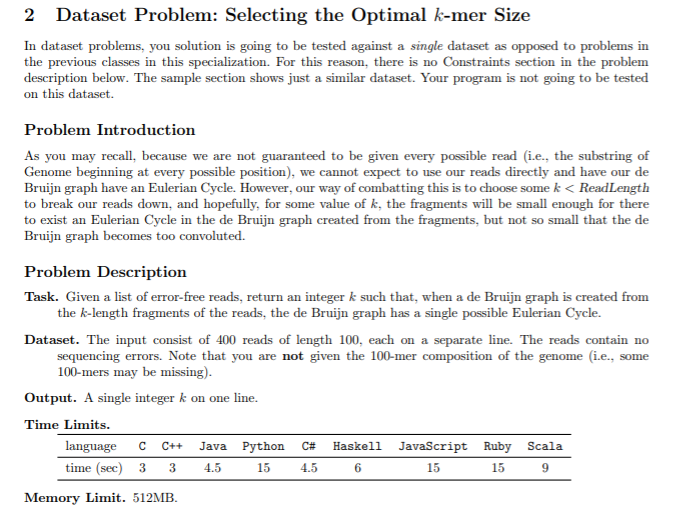

# 3. Bubble
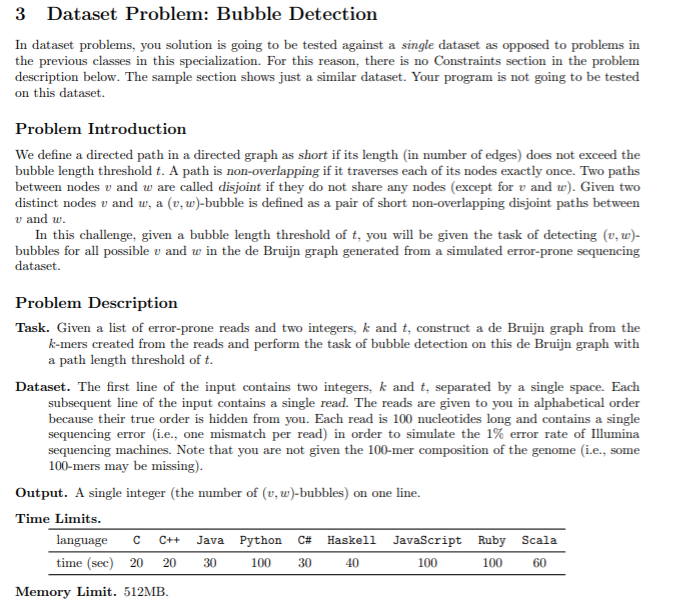

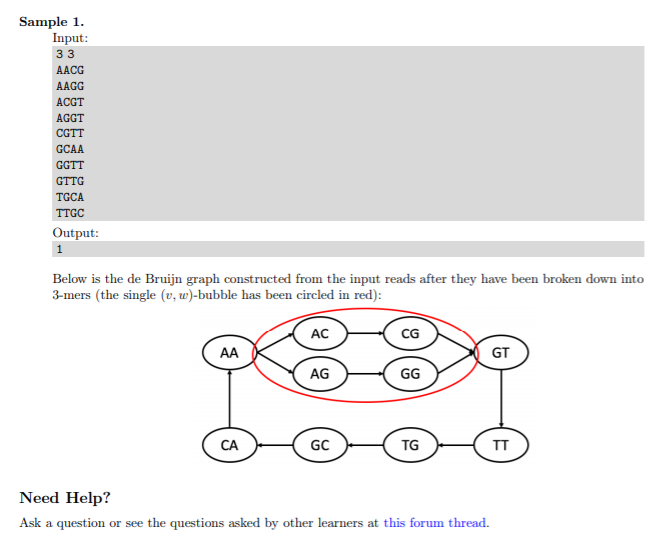

In [ ]:
# python3

import sys
import queue

class BubbleDetection:
    def __init__(self):
        adj = self._input()
        print(self.findBubbles(adj))
        

    def _input(self):
        data = list(sys.stdin.read().strip().split())
        k, t = int(data[0]), int(data[1])
        data = data[2:]
        adj = self.DeBrujin(k, data)
        return adj

    def DeBrujin(self, k, patterns):
        adj = dict()
        for p in patterns:
            l = len(p)
            for i in range(l-k+1):
                if p[i:i+k-1] in adj:
                    adj[p[i:i+k-1]][p[i+1:i+k]] = adj[p[i:i+k-1]].get(p[i+1:i+k], 0) + 1
                else:
                    adj[p[i:i+k-1]] = dict()
                    adj[p[i:i+k-1]][p[i+1:i+k]] = 1
                if p[i+1:i+k] not in adj:
                    adj[p[i+1:i+k]] = dict()
        return adj

    def findBubbles(self, adj):
        bubble = 0
        for v in adj.values():
            if len(v) > 1:
                bubble += 1
        return bubble

if __name__ == "__main__":
    BubbleDetection()